# Libraries

In [2]:
# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for plotting graphs
import matplotlib.pyplot as plt

# advanced plotting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split

# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
# early stopping
from tensorflow.keras.callbacks import EarlyStopping


# Dataset
## Loading

In [3]:
# Convert the list to a string
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

## Exploratory Data Analysis

In [9]:
# training dataset sample
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#test dataset sample
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_18386/2898885598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train, palette='Dark2', legend=False)


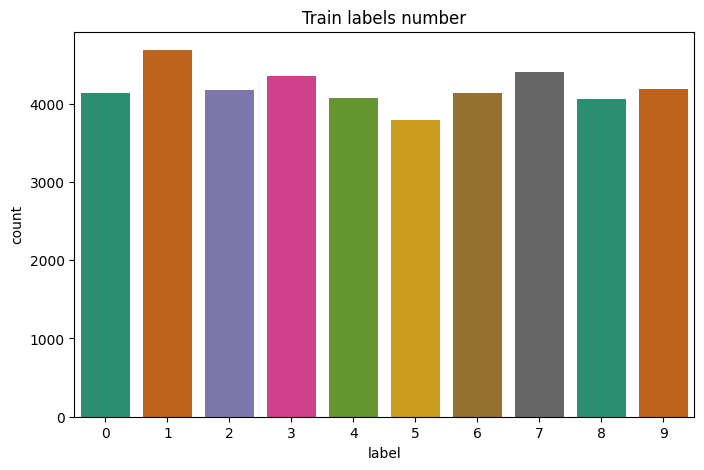

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train, palette='Dark2', legend=False)
plt.title('Train labels number')
plt.show()

In [12]:
# Training labels and their occurrences
train['label'].value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

/tmp/ipykernel_18386/904788969.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


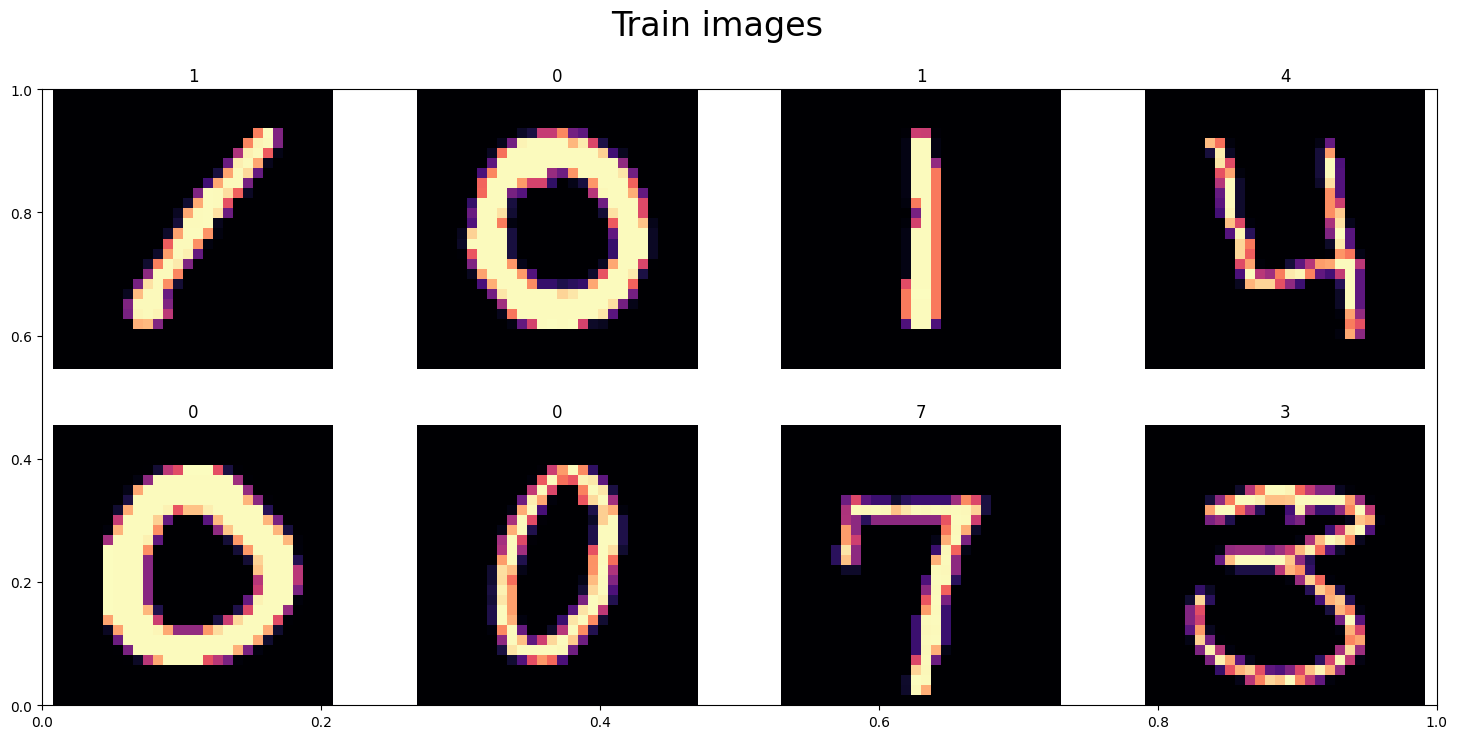

In [13]:
# Plot few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

# Preprocessing

In [14]:
# split input table into image and labels
X = train.iloc[:, 1:].to_numpy()
y = train['label'].to_numpy()

# test dataset
test = test.loc[:, :].to_numpy()

for i in [X, y, test]:
    print(i.shape)

(42000, 784)
(42000,)
(28000, 784)


In [15]:
# Data normalization
X = X / 255.0
test = test / 255.0

In [16]:
# Reshape data
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

# shape of training and test dataset
print(X.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


## One hot encoding of target

In [17]:
y_enc = to_categorical(y, num_classes = 10)

## Split training data in train and validation sets

In [18]:
# random seed
random_seed = 2

# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3, shuffle=True)

# shape
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(29400, 28, 28, 1)
(29400, 10)
(12600, 28, 28, 1)
(12600, 10)


# Train CNN
## Model parameters

In [19]:
INPUT_SHAPE = X_train.shape[1:]
OUTPUT_SHAPE = y_train_enc.shape[1]
BATCH_SIZE = 128
EPOCHS = 50
VERBOSE = 2

print(f"Model parameters:\n - input shape: {INPUT_SHAPE}\n - output_shape: {OUTPUT_SHAPE}\n - batch size: {BATCH_SIZE}\n - epochs: {EPOCHS}\n - verbose: {VERBOSE}")

Model parameters:
 - input shape: (28, 28, 1)
 - output_shape: 10
 - batch size: 128
 - epochs: 50
 - verbose: 2


## Define model

In [20]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

## Compile model

In [21]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Fit model

In [23]:
earlyStopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.001,
                               patience=3,
                               verbose=1,
                               mode='auto',
                               restore_best_weights=True)


history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3,
                    callbacks=[earlyStopping])

Epoch 1/50
161/161 - 17s - loss: 0.5728 - accuracy: 0.8191 - val_loss: 0.1269 - val_accuracy: 0.9598 - 17s/epoch - 107ms/step
Epoch 2/50
161/161 - 16s - loss: 0.1575 - accuracy: 0.9540 - val_loss: 0.0842 - val_accuracy: 0.9730 - 16s/epoch - 97ms/step
Epoch 3/50
161/161 - 12s - loss: 0.1070 - accuracy: 0.9700 - val_loss: 0.0632 - val_accuracy: 0.9813 - 12s/epoch - 76ms/step
Epoch 4/50
161/161 - 12s - loss: 0.0788 - accuracy: 0.9771 - val_loss: 0.0530 - val_accuracy: 0.9824 - 12s/epoch - 74ms/step
Epoch 5/50
161/161 - 13s - loss: 0.0617 - accuracy: 0.9799 - val_loss: 0.0691 - val_accuracy: 0.9794 - 13s/epoch - 82ms/step
Epoch 6/50
161/161 - 13s - loss: 0.0508 - accuracy: 0.9851 - val_loss: 0.0419 - val_accuracy: 0.9859 - 13s/epoch - 82ms/step
Epoch 7/50
161/161 - 12s - loss: 0.0481 - accuracy: 0.9846 - val_loss: 0.0639 - val_accuracy: 0.9817 - 12s/epoch - 74ms/step
Epoch 8/50
161/161 - 14s - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0460 - val_accuracy: 0.9870 - 14s/epoch - 87ms/step

## Loss and accuracy graphs

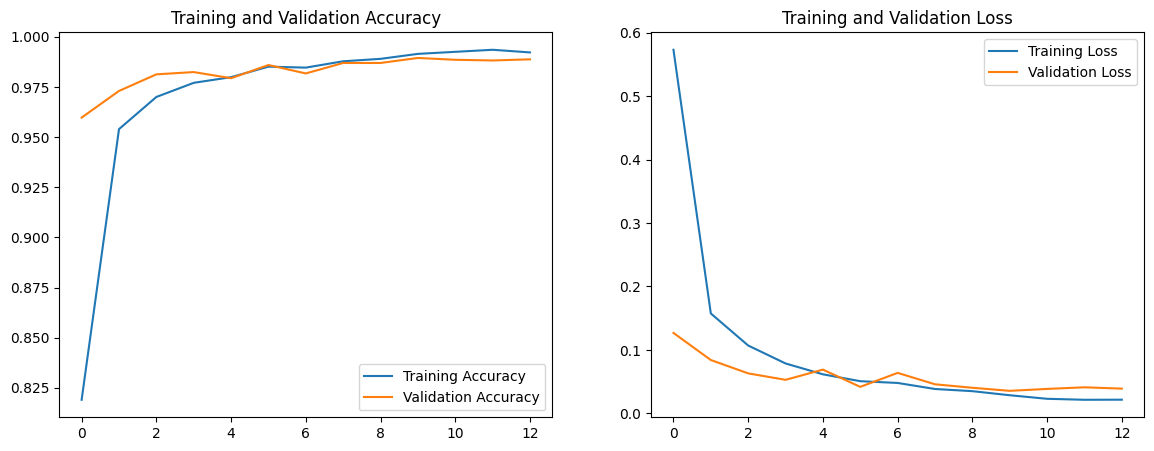

In [24]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [25]:
# Evaluate model
model.evaluate(X_val, y_val_enc, verbose=False)

[0.04765724763274193, 0.9866666793823242]

## Prediction on validation set

In [26]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

394/394 [==============================] - 3s 7ms/step


In [27]:
# Results
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1259
           1       0.99      1.00      0.99      1409
           2       0.98      0.98      0.98      1223
           3       0.98      0.98      0.98      1335
           4       0.99      0.99      0.99      1233
           5       0.98      0.99      0.98      1065
           6       1.00      0.99      0.99      1224
           7       0.98      0.99      0.98      1320
           8       0.99      0.98      0.99      1240
           9       0.98      0.98      0.98      1292

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



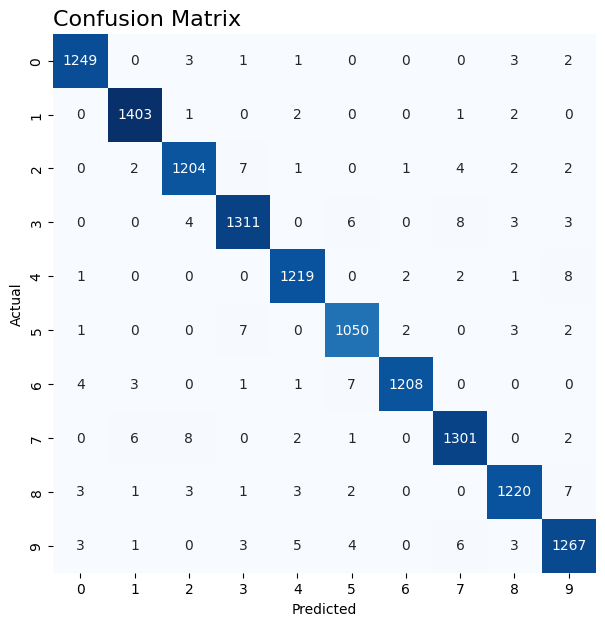

In [28]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

## Prediction on test set

In [29]:
# predicted values
y_pred_enc = model.predict(test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]


875/875 [==============================] - 6s 7ms/step


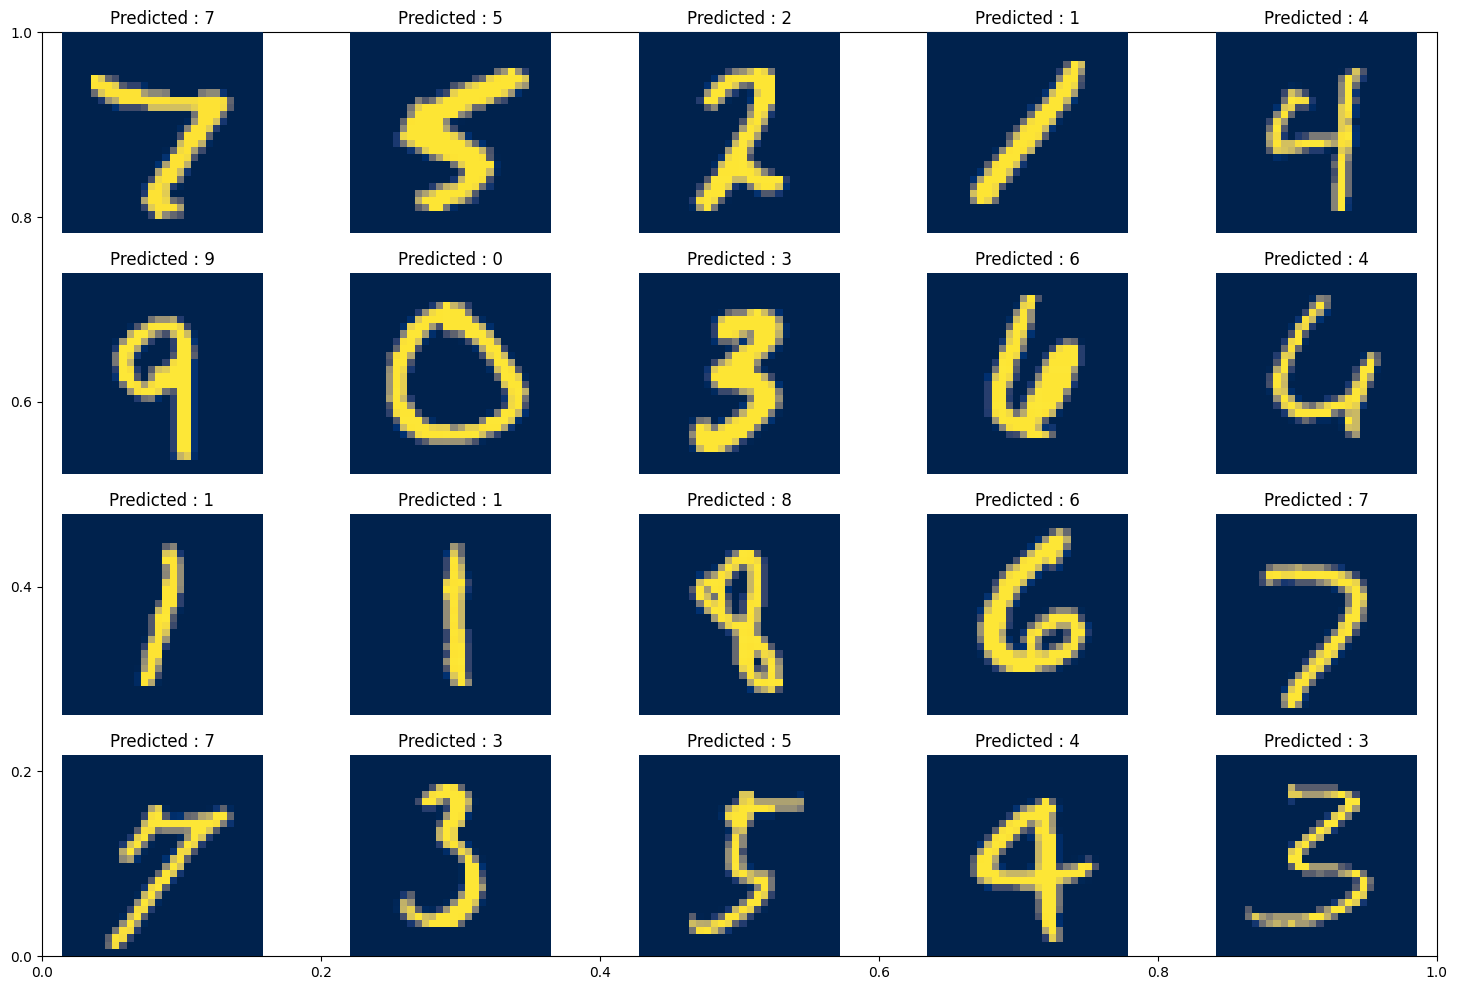

In [30]:
# Choose 20 random indices
numOfRandomImgs = 20
random_indices = np.random.choice(test.shape[0], size=20, replace=False)
fig, ax = plt.subplots(figsize=(18, 12))
for ind, index in enumerate(random_indices):
    plt.subplot(4, 5, ind+1)
    plt.title("Predicted : " + str(y_pred[index]))
    img = test[index].reshape(28, 28)  # Reshape the image
    plt.axis('off')
    plt.imshow(img, cmap='cividis')